# Business Understanding

#### The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

<img src=image.jfif>

 

#### When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

    - If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
    - If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead   to a financial loss for the company. 
#### The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

    - The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,
    - All other cases: All other cases when the payment is paid on time. 
#### When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

    - Approved : The Company has approved loan Application
    - Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.
    - Refused: The company had rejected the loan (because the client does not meet their requirements etc.).
    - Unused offer:  Loan has been cancelled by the client but on different stages of the process.
    - In this case study, we perform EDA to understand how consumer attributes and loan attributes influence the tendency of default.

## 1. Importing Required Libraries

In [1]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import statements of all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random

## 2.Reading the applications.csv data 


### 'application_data.csv'  contains all the information of the client at the time of application.The data is about whether a client has payment difficulties. Lets analyse this data and draw patterns in the data

In [3]:
#Reading data from application_data.csv 
data= pd.read_csv("application_data.csv")

# Displaying the first 5 rows of data
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Description

In [4]:
#Displaying the number of rows and columns in the data
data.shape

(307511, 122)

In [5]:
#Displaying data types of all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
#Summary of the dataset
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


## 3. Inspecting Missing Values

In [7]:
# As shown above the column has been removed 
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# percentage of null values in each column
percentageOfNullValues=data.isnull().sum()/data.shape[0]
percentageOfNullValues

SK_ID_CURR                    0.000000
TARGET                        0.000000
NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.135016
AMT_REQ_CREDIT_BUREAU_WEEK    0.135016
AMT_REQ_CREDIT_BUREAU_MON     0.135016
AMT_REQ_CREDIT_BUREAU_QRT     0.135016
AMT_REQ_CREDIT_BUREAU_YEAR    0.135016
Length: 122, dtype: float64

## 4.Handling Missing Values

In [9]:
#Verifying the count of columns which has more than 30 perent of null values in it 
percentageOfNullValues[percentageOfNullValues>0.30].count()

50

## From the above step we could see that 50 columns in appplication data have more than 30 percent null vlaues in it. Considering this may result in biasing.So Continuing our analysis ignoring/Dropping them

In [10]:
# Count of columns Containing the null value percentage less than 30
percentageOfNullValues[percentageOfNullValues<0.30].count()

72

# Lets consider only columns where count of nan values is less than 30 percent

In [11]:
data=data[percentageOfNullValues[percentageOfNullValues<0.30].index]
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Verifying the shape of the dataframe after removing the columns where columns contains more than 30 percent of null values in it
data.shape

(307511, 72)

# As we can see now the data set is free of null values where percentage of null values in a cloumn is more than 30 percent

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

# 5.Datatype Handling

In [14]:
#changing negative ages to positive ages for further anslysis
data['DAYS_BIRTH']=abs(data['DAYS_BIRTH'])
data['DAYS_BIRTH'].describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [15]:
#changing negative values in days to positive days for further anlysis
data['DAYS_EMPLOYED']=abs(data['DAYS_EMPLOYED'])
data['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [16]:
#changing negative days to positive days for further analysis
data['DAYS_REGISTRATION']=abs(data['DAYS_REGISTRATION'])
data['DAYS_REGISTRATION'].describe()

count    307511.000000
mean       4986.120328
std        3522.886321
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64

In [17]:
#changing negative days to positive for further analysis
data['DAYS_ID_PUBLISH']=abs(data['DAYS_ID_PUBLISH'])
data['DAYS_ID_PUBLISH'].describe()

count    307511.000000
mean       2994.202373
std        1509.450419
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [18]:
#converting the data type of given categorical column
data['REG_REGION_NOT_LIVE_REGION'] = data['REG_REGION_NOT_LIVE_REGION'].astype(object)
data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 72, dtype: object

In [19]:
#Changing region daatype
data['REG_REGION_NOT_WORK_REGION'] = data['REG_REGION_NOT_WORK_REGION'].astype(object)

In [20]:
#Changing region datatype
data['LIVE_REGION_NOT_WORK_REGION'] = data['LIVE_REGION_NOT_WORK_REGION'].astype(object)

In [21]:
#Changing city datatype
data['REG_CITY_NOT_LIVE_CITY'] = data['REG_CITY_NOT_LIVE_CITY'].astype(object)

In [22]:
#Changing city datatype
data['REG_CITY_NOT_WORK_CITY'] = data['REG_CITY_NOT_WORK_CITY'].astype(object)

In [23]:
#Changing city datatype
data['LIVE_CITY_NOT_WORK_CITY']=data['LIVE_CITY_NOT_WORK_CITY'].astype(object)

In [24]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Target:

## Analysing the Target Column and verifying that target doesn't contain any nan values in it

- 1: Payment difficulties

- 0: Other case

- Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)

In [25]:
data['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [26]:
print("Percentage of people with other than Payment difficulties 0's",data['TARGET'].value_counts()[0]/data.shape[0])
print("Percentage of people with payment difficulties 1's: ",data['TARGET'].value_counts()[1]/data.shape[0])

Percentage of people with other than Payment difficulties 0's 0.9192711805431351
Percentage of people with payment difficulties 1's:  0.08072881945686496


<AxesSubplot:>

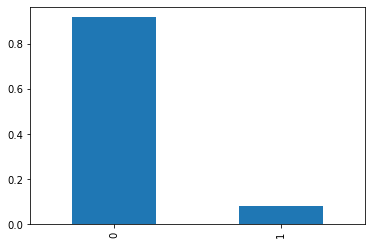

In [27]:
data['TARGET'].value_counts(normalize=True).plot(kind='bar')

# Insights:

## Observations on column `TARGET` from applictaion_data is:

- Customers falling under Category: 1`(Defaulters/Having payment difficulties)` is about 8 percent

- Customers falling under Category : 0`(Non-Defaulters)` is about 92 percent

# [](http://)![](http://)# 6.Univariate Analysis

# Categorical Unordered univariate analysis

In [28]:
# df0 represents target==0 which means customers belonging to non-defaulters

# df1 represents target ==1 which means customers belonging to defaulters/having payment difficulties

df0=data[data['TARGET']==0]
df1=data[data['TARGET']==1]

# Since our output column(target) is having 0 and 1 we created df0 and df1 to represnt binary classification

In [29]:
#Creation of univariate analysis(univ_anal) Method which is reusable, And helps us in performing further analysis with less lines of code

def univ_anal(variable_analysis):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.title('Distribution for Non-Defaulter on '+variable_analysis,fontdict={'fontsize':13})
    sns.countplot(df0[variable_analysis])   #seaborn for more advanced colors
    plt.xticks(rotation=90)
    plt.subplot(1,2,2)
    plt.title('Distribution for Defaulter on '+variable_analysis,fontdict={'fontsize':13})
    sns.countplot(df1[variable_analysis])
    plt.xticks(rotation=90)

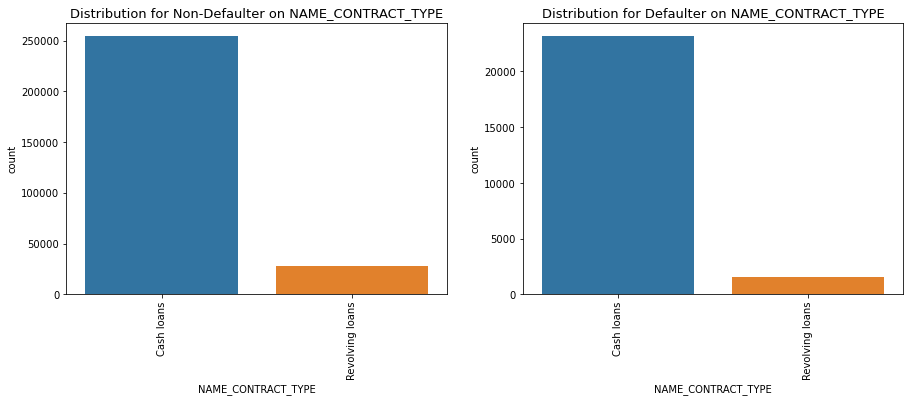

In [30]:
#Distribution for Non-Defaulter and Defaulter on NAME_CONTRACT_TYPE
univ_anal('NAME_CONTRACT_TYPE')

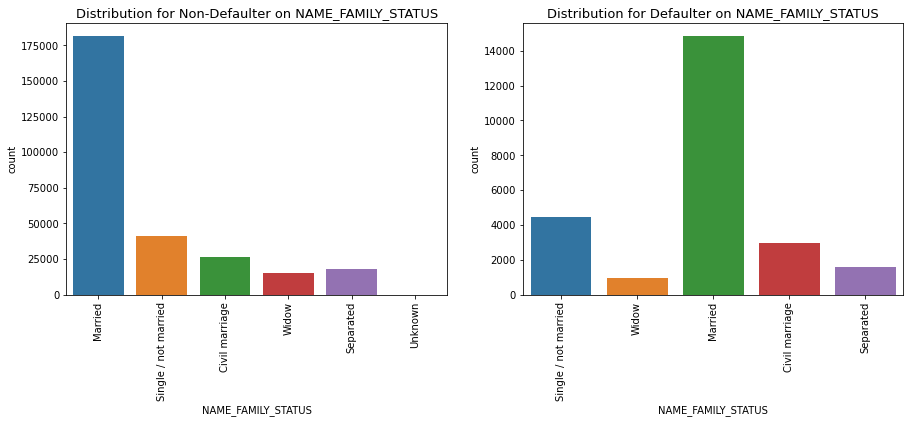

In [31]:
#Distribution for Non-Defaulter and Defaulter on NAME_FAMILY_STATUS

univ_anal('NAME_FAMILY_STATUS')

# Insights:
 
-  Proportion of Married customers falling in default category is high when compared with all other categories,This can be due to higher rate of customers taking the loan from this category
-  Single/Not married category has higher proportion count falling under default when compared with non-default count

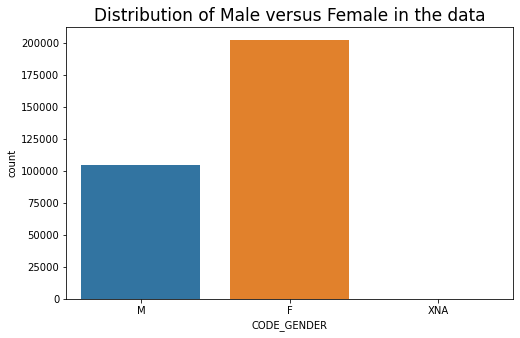

In [32]:
plt.figure(figsize=(8,5))
plt.title('Distribution of Male versus Female in the data',fontdict={'fontsize':17})
sns.countplot(data.CODE_GENDER) 
plt.show()

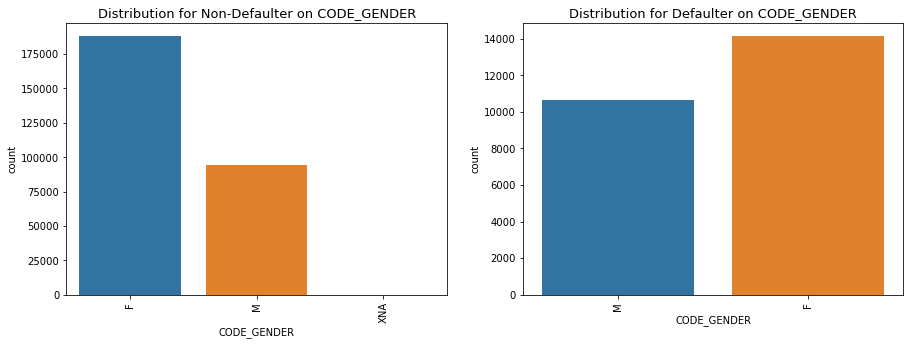

In [33]:
#Distribution for Non-Defaulter and Defaulter on CODE_GENDER
univ_anal('CODE_GENDER')

# Insights:

- From the above two plots we could observe that Female catgeory in the dataset is twice as male category.In results to that we have above graph mentioning that in defaulter and non-defaulter Female category has a high count.Further analysis is done under bivariate anlysis to infer results from *`GENDER`* category.

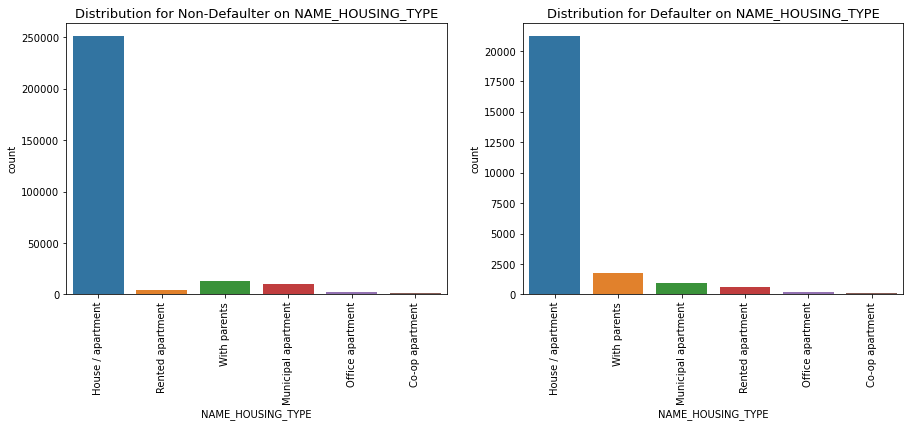

In [34]:
#Distribution for Non-Defaulter and Defaulter on NAME_HOUSING_TYPE

univ_anal('NAME_HOUSING_TYPE')

# Insights:

- `House/Apartments` category has a highest category of customers walking into bank for loans
- `Rental apartment` category has more defaulters than non-defaulters,its a clear insight in the real world that there monthly expenses are going with house rents and which may lead to fall in defaulters list,This needs to be considered while giving loans
- If we observe the scale of the plots even `with parents` category has higher chances in falling under default category
- `House/Apartments` category has lot of defaulters its almost 8-10% when compared with the non-defaulters count

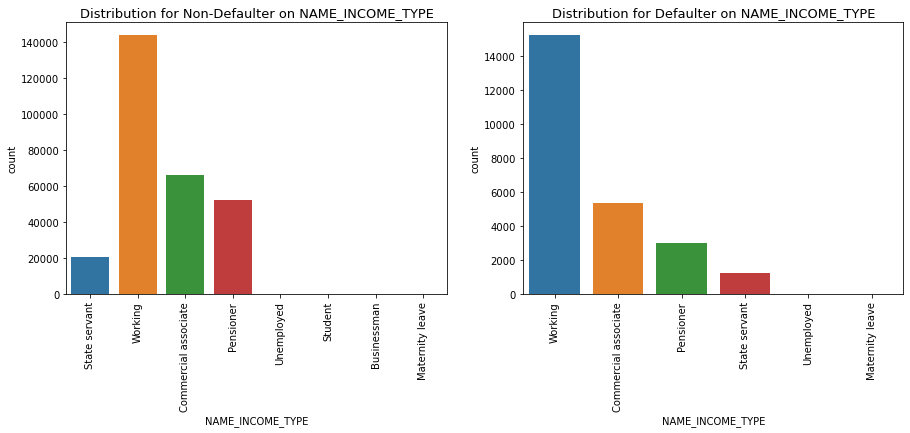

In [35]:
#Distribution for Non-Defaulter and Defaulter on NAME_INCOME_TYPE

univ_anal('NAME_INCOME_TYPE')

# Insights:

- The data implies almost same behavior with all the categories with respect to defaulters and Non-defaulters
- On Concentrated observation we could see that percentage of Pensioner being in default is less when compared with other categories.So bank can concentrate in this category to generate profits by taking certain steps like reducing loan amount 

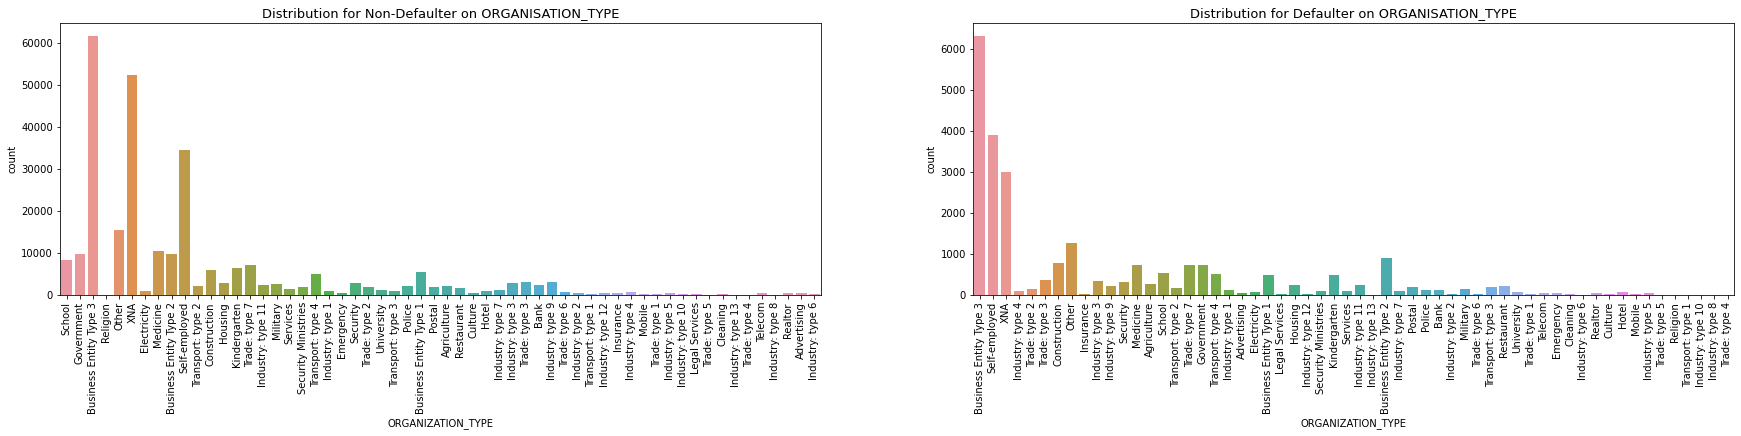

In [36]:
#Distribution for Non-Defaulter and Defaulter on ORGANISATION_TYPE

plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
plt.title('Distribution for Non-Defaulter on ORGANISATION_TYPE',fontdict={'fontsize':13})
sns.countplot(df0['ORGANIZATION_TYPE'])   #seaborn for more advanced colors
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title('Distribution for Defaulter on ORGANISATION_TYPE',fontdict={'fontsize':13})
sns.countplot(df1['ORGANIZATION_TYPE'])
plt.xticks(rotation=90)
plt.show()

# Insights:

- We cold observe that most of the categories is having 10 percent defualters when compared with non-defaulters.
- `Business Entity Type3` and `self-employed` has higher percentage of defaulter count
- `Business Entity Type 1` has more defaulter count when compared with overall percentage of that category

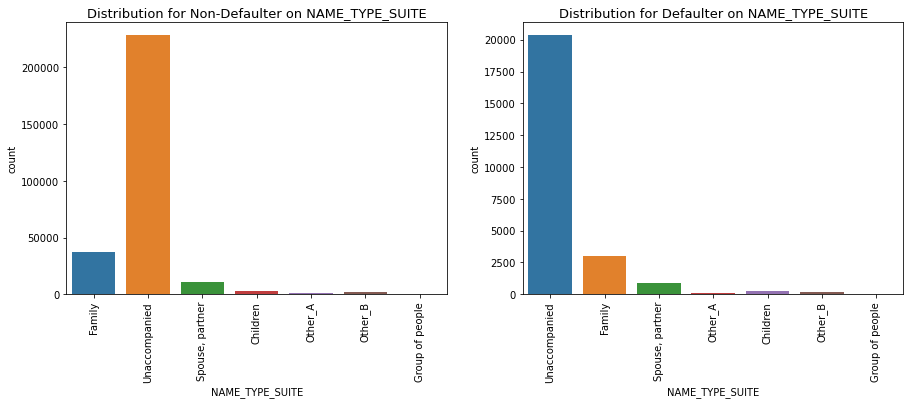

In [37]:
#Distribution for Non-Defaulter and Defaulter on NAME_TYPE_SUITE
univ_anal('NAME_TYPE_SUITE')

# Insights:

- `NAME_TYPE_SUITE` tells about person acompnying while applying for the loan and we could observe there is almost similar relation in both defaulter and Non-defaulter category.
- We can use this varibale for further anlysis in bivariate to inccur if this variable is having any strong correlation with other variables in a dataset

# Categorical Ordered univariate analysis

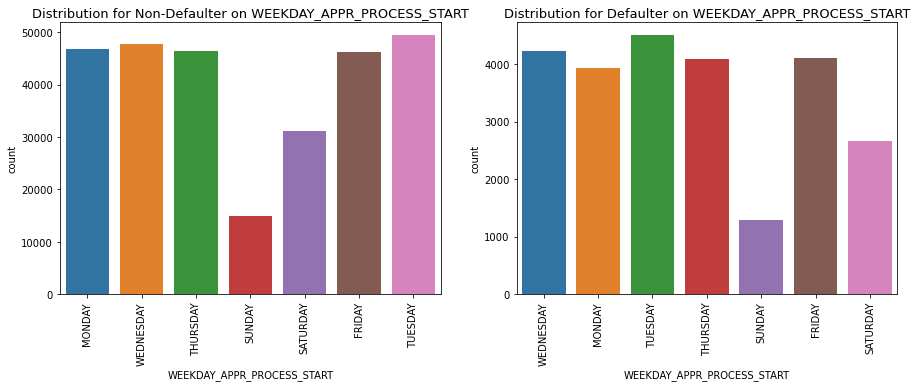

In [38]:
univ_anal('WEEKDAY_APPR_PROCESS_START')

# Insights:

- Day on which loan has been processed doesn't really imply the outcome/Target

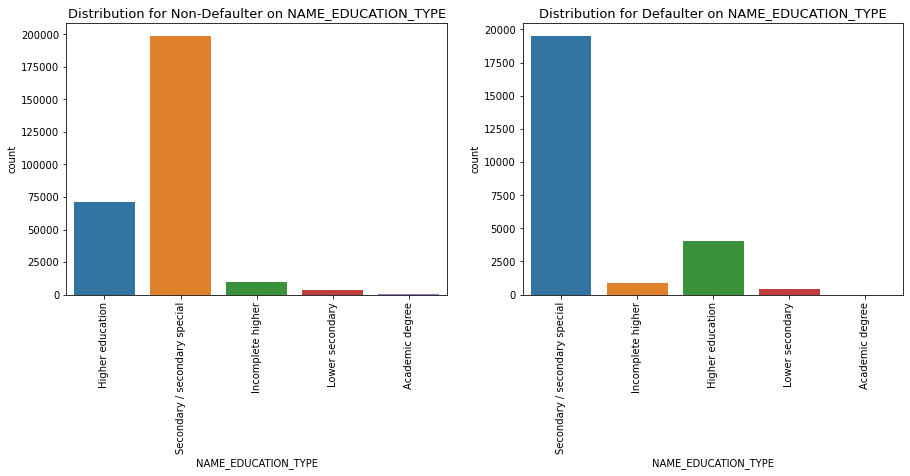

In [39]:
#Distribution for Non-Defaulter and Defaulter on NAME_EDUCATION_TYPE

univ_anal('NAME_EDUCATION_TYPE')

# Insights:

- Academic degree looks more profitable for banks since the Defaulter percentage is very less in this category when compared with other categories.
- As the education level increases the Defaulters count is decreasing, This is quite realistic that customers might have settled with certain jobs and able to Repay the loans.
- Higher eduaction clearly implies less Defaulters to the bank. So bank can concentrate on giving loans accordingly.

# 7.Bivariate Analyssis

## Numeric - Numeric analysis

- There are three ways to analyse the *`numeric- numeric`* data types simultaneously.
- **Scatter plot**: describes the pattern that how one variable is varying with other variable.
- **Correlation matrix**: to describe the linearity of two numeric variables.
- **Pair plot**: group of scatter plots of all numeric variables in the data frame.

In [40]:
def multi_anal(groupby_var,target):  #multi-varibale analysis resusable method
    plt.figure(figsize=(13,5))
    plt.subplot(1,2,1)
    plt.title('Distribution of Non-Defaulter Category\n'+' V/S '+groupby_var)
    sns.countplot(x=groupby_var,hue=target,data=df0)
    plt.xticks(rotation=90)
    plt.subplot(1,2,2)
    plt.title('Distribution of Defaulter Category\n'+' V/S '+groupby_var)
    sns.countplot(x=groupby_var,hue=target,data=df1)
    plt.xticks(rotation=90)
    plt.show()

In [41]:
def multivaranal_scatter(x,y):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.title("NO payment Difficulties")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.scatter(x,y,data=df0)
    plt.subplot(1,2,2)
    plt.title("Defaulter/Payment Difficulties")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.scatter(x,y,data=df1)
    plt.show()

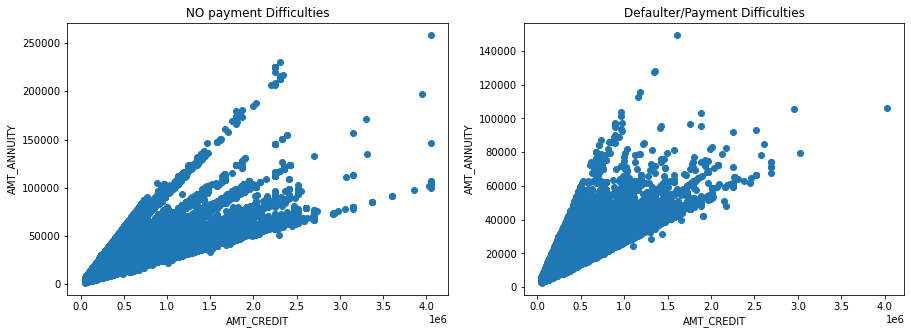

In [42]:
multivaranal_scatter('AMT_CREDIT','AMT_ANNUITY')

# Insights:

- We could easily observe thatCredit amount of the loan is linearly related with Amt_annuity

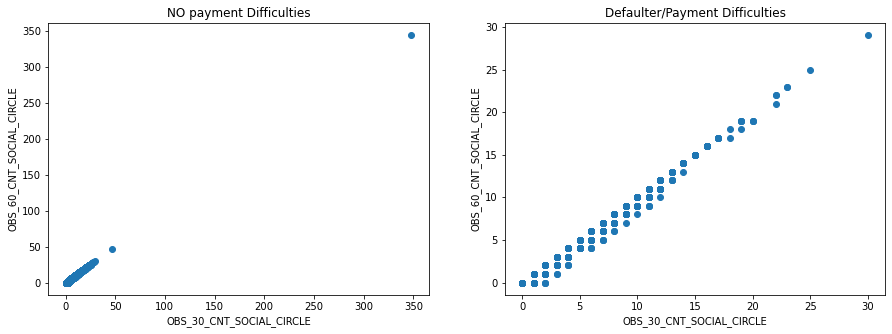

In [43]:
multivaranal_scatter('OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE')

# Insgihts:

- we could observe that `OBS_30_CNT_SOCIAL_CIRCLE` and `OBS_60_CNT_SOCIAL_CIRCLE` are linearly related

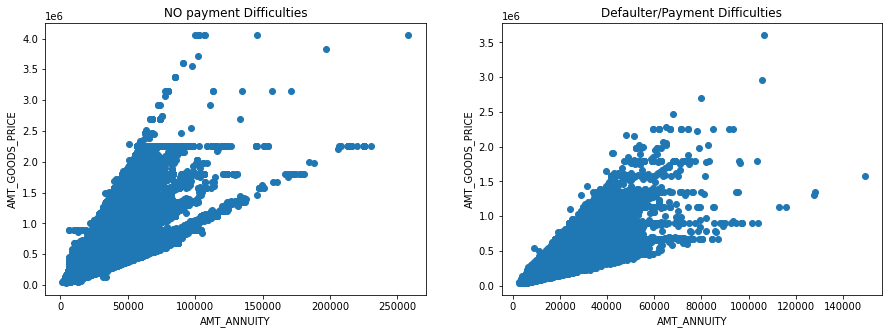

In [44]:
multivaranal_scatter('AMT_ANNUITY','AMT_GOODS_PRICE')

# Insights:

- This is quite Obvious that sum of Amount_ANNUITY(Term repayments) is equal to the loan amount and our plot depicts the same
- when both plots scales are compared it says that the `AMT_ANNUITY` scale is less than 140000,when compared with No payment difficulties it says that the higher amount installments dont have much much defaulters which is one way profit to the bank with regular payments from customers

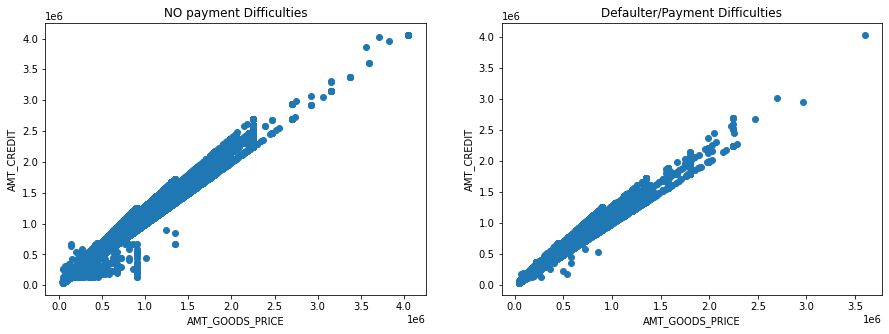

In [45]:
multivaranal_scatter('AMT_GOODS_PRICE','AMT_CREDIT')

# Insights:

- `AMT_GOODS_PRICE` AND `AMT_CREDIT` are almost linearly related
- As observed from defaulters list there are some customers under defaulter category at higher goodsprice. Its better to analyse other varibales and reduce the oan amount to such customers to reduce the loss to the bank

# Numeric - Categorical


## `In our datasheet Target is categorical, Lets Compare this with other numeric values in dataset`

<AxesSubplot:xlabel='TARGET', ylabel='DAYS_BIRTH'>

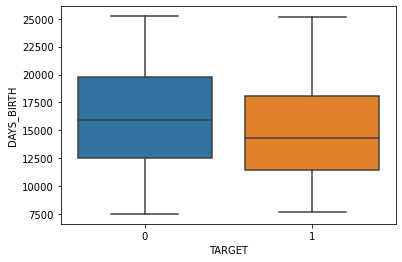

In [46]:
sns.boxplot(x='TARGET',y='DAYS_BIRTH',data=data)

# Insights:

- As we can see that Younger age group has more Payment difficulties when compared with older age group
- We can also observe thatAge group greater than 47(17500/365) has very less payment difficulties

<AxesSubplot:xlabel='TARGET', ylabel='AMT_ANNUITY'>

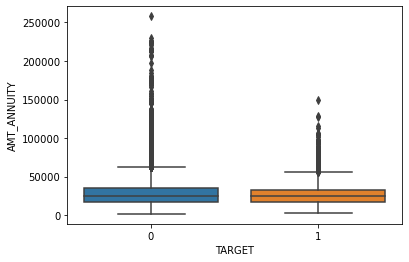

In [47]:
sns.boxplot(x='TARGET',y='AMT_ANNUITY',data=data)

# Insights:

- `AMT_ANNUITY` tells us about the series of payments made by the customer, We could observe that Higher installments are getting paid on time as we can see higher Annuity payments fall under non-defaulter's list


<AxesSubplot:xlabel='TARGET'>

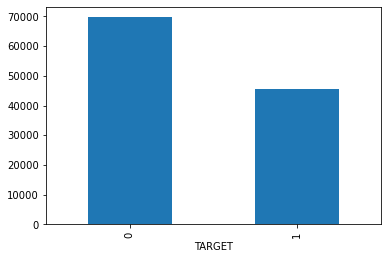

In [48]:
data.groupby('TARGET')['DAYS_EMPLOYED'].mean().plot(kind='bar')

# Insights:

- As observed from the Plot we could see that the Customer working in the company for longer duration of time has less chance of falling under defaulter,Which can be considered while giving loan

# EXPLANATION

- AMT_INCOME_TOTAL: tOTAL INCOME OF THE CLIENT
- AMT_CREDIT : CREDIT AMOUNT OF THE LOAN
- AMT_ANNUITY: SERIES OF EQUAL AMOUNTS PAID
- AMT_GOODSPRICE: For consumer loans it is the price of the goods for which the loan is given

<AxesSubplot:xlabel='TARGET', ylabel='AMT_GOODS_PRICE'>

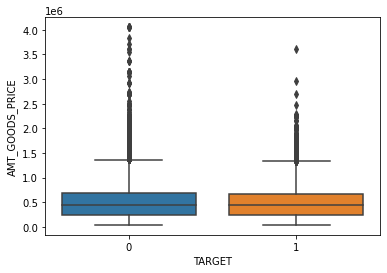

In [49]:
sns.boxplot('TARGET','AMT_GOODS_PRICE',data=data)

# Insights:

- AMT_GOODS_PRICE  tells us about the price of goods for which amount of loan is given by bank, We could observe that Higher Goods price for which loan was given is under non-default category(0) which is profit for bank.
- Plot2 shows that there are huge set of customers who fall under Non-defaulter category, Where bank is giving loans for higher amount of Goods.This should be taken care to make profits.

<AxesSubplot:xlabel='TARGET', ylabel='CNT_FAM_MEMBERS'>

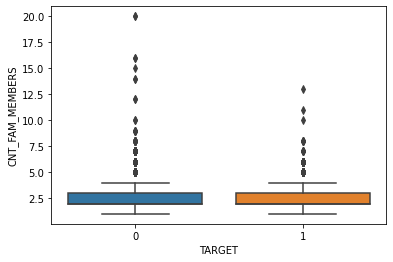

In [50]:
sns.boxplot('TARGET','CNT_FAM_MEMBERS',data=data)

# Insights:

- From the above plot we could see that increase in count of family members doesn'r really impact the final target variable
- But further analysis can be made on this in mutivariate analysis.

<AxesSubplot:xlabel='TARGET', ylabel='HOUR_APPR_PROCESS_START'>

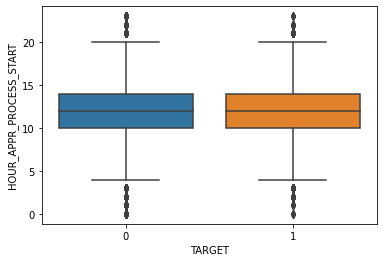

In [51]:

sns.boxplot('TARGET','HOUR_APPR_PROCESS_START',data=data)

# Insisghts:

- As observed from the above plot `HOUR_APPR_PROCESS_START` doesn't make much difference in defaulters and Non-defaulters. 

<AxesSubplot:xlabel='TARGET', ylabel='DAYS_LAST_PHONE_CHANGE'>

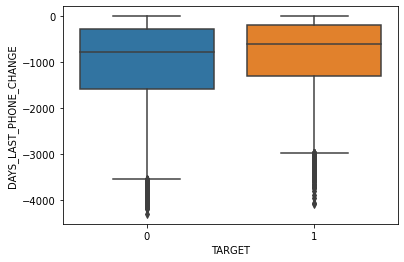

In [52]:

sns.boxplot('TARGET','DAYS_LAST_PHONE_CHANGE',data=data)

# Insights:

- In defaulter list we could see that there is a change in the *`phoneNumber`* in the recent days, Even 75th percentile is close to the loan processing day.So we may consider this for further analysis to gain more insights out of it

<AxesSubplot:xlabel='TARGET', ylabel='AMT_ANNUITY'>

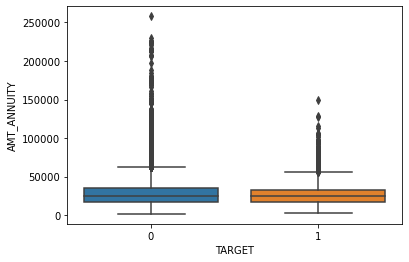

In [53]:
sns.boxplot('TARGET','AMT_ANNUITY',data=data)

In [54]:
df1.AMT_ANNUITY.describe()

count     24825.000000
mean      26481.744290
std       12450.676999
min        2722.500000
25%       17361.000000
50%       25263.000000
75%       32976.000000
max      149211.000000
Name: AMT_ANNUITY, dtype: float64

# Insights:

- `AMT_ANNUITY` is the series of amount paid at equal intervals.The plot depicts that defaulters are more when the AMT_ANNUITY is less than 149211.


# Categorical vs Categorical

In [55]:
def multi_anal(groupby_var,target):  #multi-varibale analysis resusable method
    plt.figure(figsize=(13,5))
    plt.subplot(1,2,1)
    plt.title('Distribution of Non-Defaulter Category\n'+' V/S '+groupby_var)
    sns.countplot(x=groupby_var,hue=target,data=df0)
    plt.xticks(rotation=90)
    plt.subplot(1,2,2)
    plt.title('Distribution of Defaulter Category\n'+' V/S '+groupby_var)
    sns.countplot(x=groupby_var,hue=target,data=df1)
    plt.xticks(rotation=90)

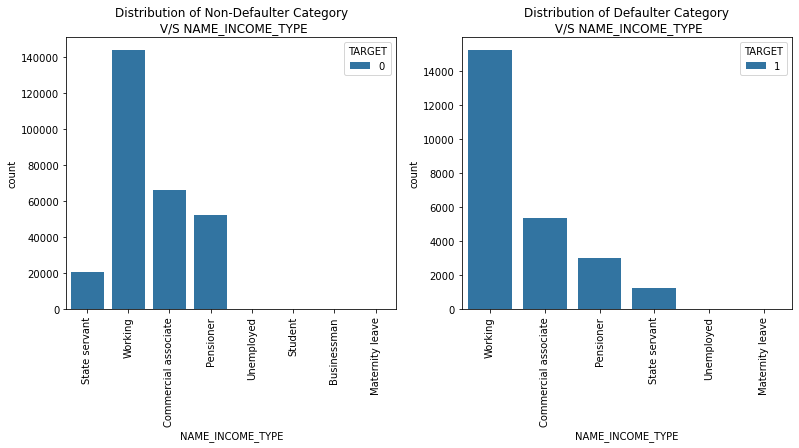

In [56]:

multi_anal('NAME_INCOME_TYPE','TARGET')

# Insights:

- We can understand from the above plot that pensioner people are better for Bank and we can provide loans to them in a safer manner when compared with other categories
- State Servent,Commercial Assocaite follows the next category of low risk followed by pensioner category

- Unemployed and Maternity leave Category stands high in becoming a defaulter

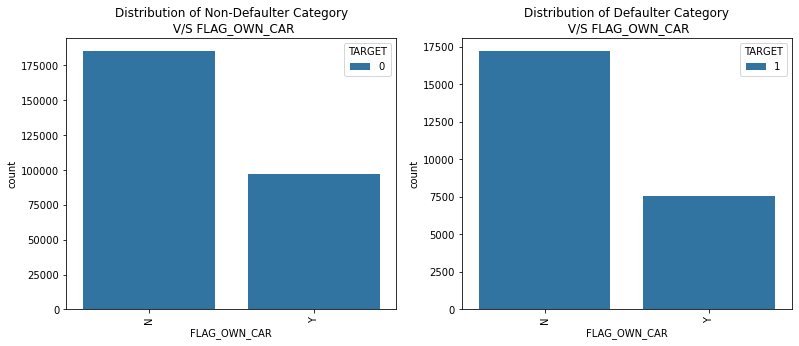

In [57]:
multi_anal('FLAG_OWN_CAR','TARGET')

# Insights:

- As observed percentage of customers owning a car and not owning a car is almost half, Which is quite realistic.

## Customer Owning a car:

- Percentage of customer owning a car and falling in defaulters is quite less but doesn't imply drastic difference.

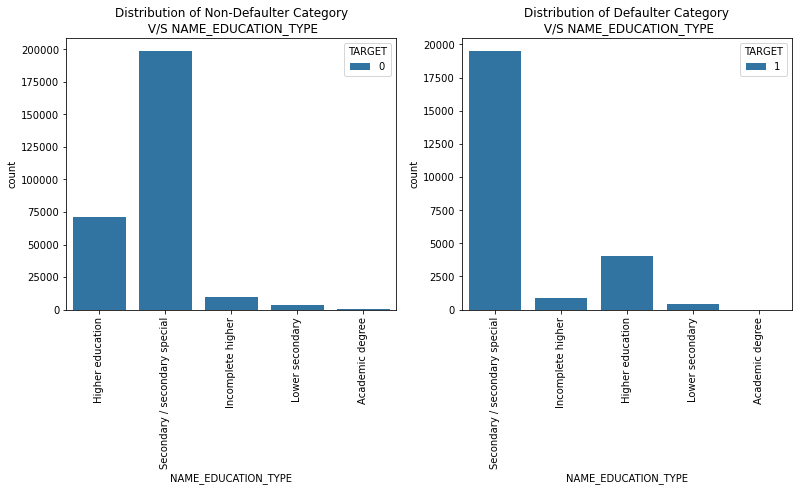

In [58]:
multi_anal('NAME_EDUCATION_TYPE','TARGET')

# Insights:

- Graph Clearly replicates that Acamedic degree candidates are less chance to be in defaulter list,Which is profit for company
- Minimal education level clearly implies that there is a chance of loss incurring lossed from those category of people

<AxesSubplot:xlabel='ORGANIZATION_TYPE'>

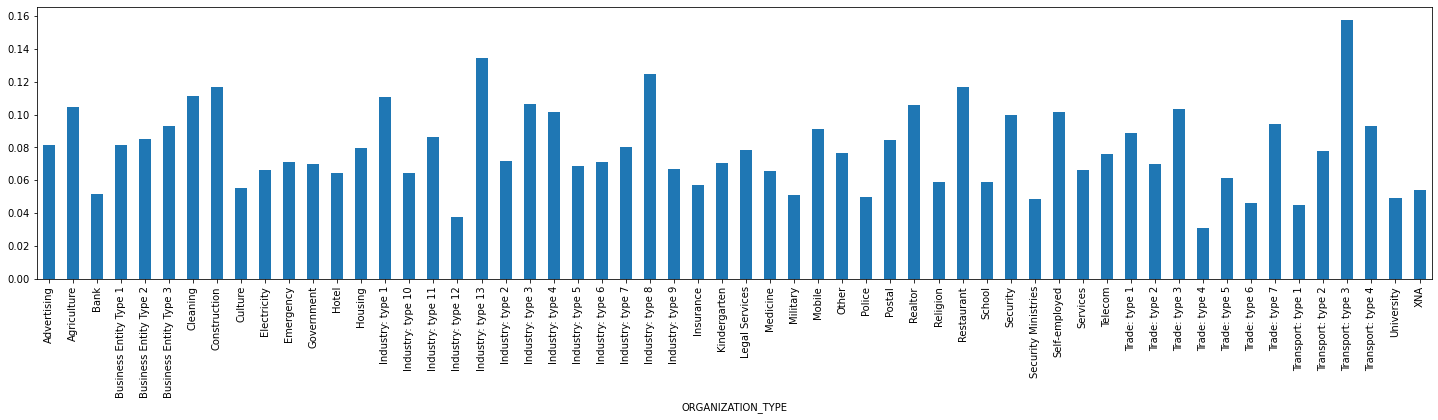

In [59]:
plt.figure(figsize=(25,5))
data.groupby('ORGANIZATION_TYPE')['TARGET'].mean().plot(kind='bar')

# Insights:

- This clearly provides insights about which Organisation_type customers are more in loan defaulters list


# Correlation matrix

In [61]:
# considering index element form 61 since 60 numeric variables themselves(same variable has high correlation) equals to 1
data.corr().abs().unstack().sort_values(ascending= False)[61:82]

REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.950842
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.950842
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.879161
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.879161
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.860517
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.860517
AMT_GOODS_PRICE              AMT_ANNUITY                    0.775109
AMT_ANNUITY                  AMT_GOODS_PRICE                0.775109
                             AMT_CREDIT                     0.770138
AMT_CREDIT                   AMT_ANNUITY                    0.770138
DAYS_BIRTH                   DAYS_EMPLOYED                  0.623941
DAYS_EMPLOYED                DAYS_BIRTH                     0.623941
FLAG_EMP_PHONE               DAYS_BIRTH                     0.619888
DAYS_BIRTH                   FLAG_EMP_PHONE                 0.619888
FLAG_DOCUMENT_6              DAYS_

# Insights from Correlation table:

- DAYS_EMPLOYED                FLAG_EMP_PHONE                 0.999755
- FLAG_EMP_PHONE               DAYS_EMPLOYED                  0.999755
- OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998490
- OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998490
- AMT_GOODS_PRICE              AMT_CREDIT                     0.986968
- AMT_CREDIT                   AMT_GOODS_PRICE                0.986968
- REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.950842
- REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.950842
- CNT_FAM_MEMBERS              CNT_CHILDREN                   0.879161
- CNT_CHILDREN                 CNT_FAM_MEMBERS                0.879161
- LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.860627
- REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.860627
- DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.860517
- DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.860517
- LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.825575
- REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.825575
- AMT_ANNUITY                  AMT_GOODS_PRICE                0.775109
- AMT_GOODS_PRICE              AMT_ANNUITY                    0.775109
- AMT_CREDIT                   AMT_ANNUITY                    0.770138
- AMT_ANNUITY                  AMT_CREDIT                     0.770138
- FLAG_EMP_PHONE               DAYS_BIRTH                     0.619888
- DAYS_BIRTH                   FLAG_EMP_PHONE                 0.619888
- DAYS_EMPLOYED                DAYS_BIRTH                     0.615864
- DAYS_BIRTH                   DAYS_EMPLOYED                  0.615864
- FLAG_EMP_PHONE               FLAG_DOCUMENT_6                0.597732


# Visualisation for the high correlated varibales

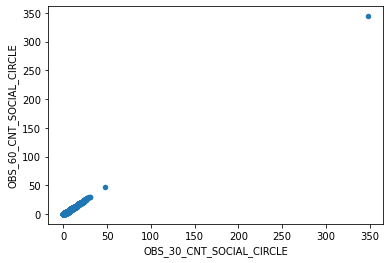

In [62]:
# Top 1 Correlated variables

data.plot.scatter(x='OBS_30_CNT_SOCIAL_CIRCLE',y='OBS_60_CNT_SOCIAL_CIRCLE')
plt.show()

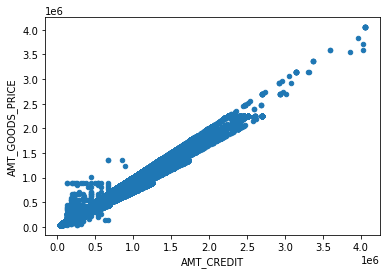

In [63]:
# Top 2 Correlated variables

data.plot.scatter(x='AMT_CREDIT',y='AMT_GOODS_PRICE')
plt.show()

# Insights:

- As we could observe that As the AMT_CREDIT and AMT_GOODS_PRICE is linearly related this is quite obvious that when customer resaches bank for loan amount, the bank will decide the amount to give based on the cutsomer history
-

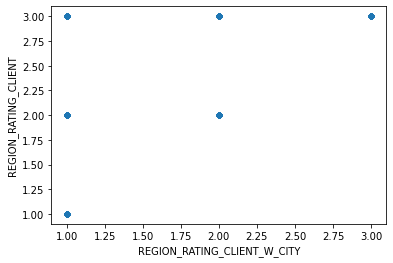

In [64]:
# Top 3 Correlated variables

data.plot.scatter(x='REGION_RATING_CLIENT_W_CITY',y='REGION_RATING_CLIENT')
plt.show()

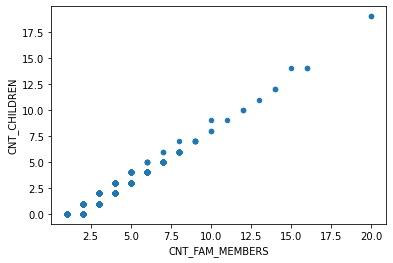

In [65]:
# Top 4 Correlated variables

data.plot.scatter(x='CNT_FAM_MEMBERS',y='CNT_CHILDREN')
plt.show()

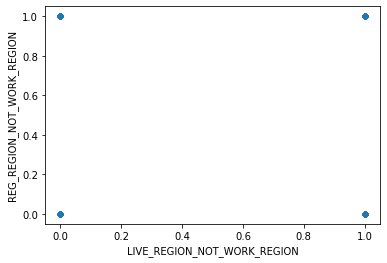

In [66]:
# Top 5 Correlated variables
data.plot.scatter(x='LIVE_REGION_NOT_WORK_REGION',y='REG_REGION_NOT_WORK_REGION')
plt.show()

# Insights:

- `LIVE_REGION_NOT_WORK_REGION` and `REG_REGION_NOT_WORK_REGION` are highly correlated.
- If the value of one categorical column is 0 the other will be 1

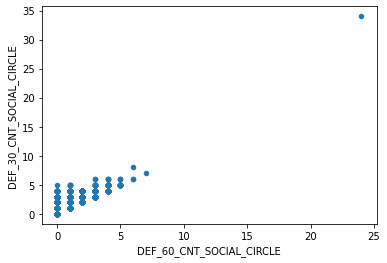

In [67]:
# Top 6 Correlated variables
data.plot.scatter(x='DEF_60_CNT_SOCIAL_CIRCLE',y='DEF_30_CNT_SOCIAL_CIRCLE')
plt.show()

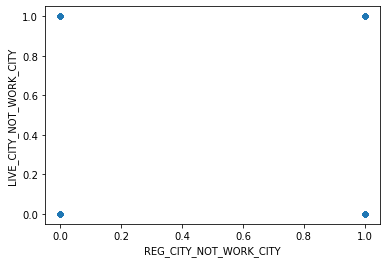

In [68]:
   # Top 7 Correlated variables

data.plot.scatter(x='REG_CITY_NOT_WORK_CITY',y='LIVE_CITY_NOT_WORK_CITY')
plt.show()

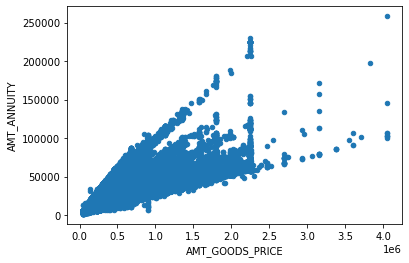

In [69]:
# Top 8 Correlated variables

data.plot.scatter(x='AMT_GOODS_PRICE',y='AMT_ANNUITY')
plt.show()

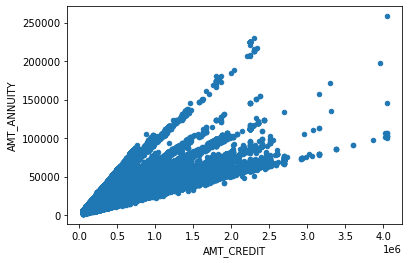

In [70]:
# Top 9 Correlated variables

data.plot.scatter(x='AMT_CREDIT',y='AMT_ANNUITY')
plt.show()

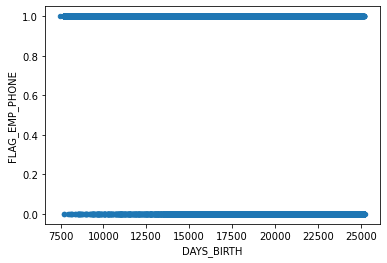

In [71]:
# Top 10 Correlated variables

data.plot.scatter(x='DAYS_BIRTH',y='FLAG_EMP_PHONE')
plt.show()

####   End of Correlation Analysyis

### Lets analyse 'previous_application.csv' contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

#### Analysing this data helps in understanding the banks behavior in the previous loans

# Previous Application Dataset

In [73]:
import pandas as pd

In [74]:
#Reading the previous application dataset

prev_appl=pd.read_csv('previous_application.csv')
prev_appl

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [75]:
prev_appl.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


# Data Description

In [76]:
#shape of the data
prev_appl.shape

(1670214, 37)

In [77]:
prev_appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [78]:
#statistical description of the data
prev_appl.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


# Identification and Treatment of Null values

In [79]:
percentageofnullvalues=((prev_appl.isnull().sum()/prev_appl.shape[0])*100).round(2)
percentageofnullvalues

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

# Lets consider only columns having less than 20 percent of null values in it

In [80]:
# Lets consider only columns having less than 20 percent of null values in it

prev_appl=prev_appl[percentageofnullvalues[percentageofnullvalues<20].index]
prev_appl

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,...,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,17145.0,17145.0,SATURDAY,15,Y,1,XAP,...,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,middle,POS mobile with interest
1,2802425,108129,Cash loans,607500.0,679671.0,THURSDAY,11,Y,1,XNA,...,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,112500.0,136444.5,TUESDAY,11,Y,1,XNA,...,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,high,Cash X-Sell: high
3,2819243,176158,Cash loans,450000.0,470790.0,MONDAY,7,Y,1,XNA,...,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,337500.0,404055.0,THURSDAY,9,Y,1,Repairs,...,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high,Cash Street: high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,267295.5,311400.0,WEDNESDAY,12,Y,1,XAP,...,XAP,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,low_normal,POS industry with interest
1670210,2357031,334635,Consumer loans,87750.0,64291.5,TUESDAY,15,Y,1,XAP,...,XAP,New,Furniture,POS,XNA,Stone,43,Furniture,middle,POS industry with interest
1670211,2659632,249544,Consumer loans,105237.0,102523.5,MONDAY,12,Y,1,XAP,...,XAP,Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,low_normal,POS household with interest
1670212,2785582,400317,Cash loans,180000.0,191880.0,WEDNESDAY,9,Y,1,XNA,...,XAP,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,low_normal,Cash X-Sell: low


In [81]:
# Verifying the column  count after removal of columns in the previous step 
prev_appl.shape

(1670214, 23)

In [82]:
# Previous application top 5 rows

prev_appl.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,...,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,17145.0,17145.0,SATURDAY,15,Y,1,XAP,...,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,middle,POS mobile with interest
1,2802425,108129,Cash loans,607500.0,679671.0,THURSDAY,11,Y,1,XNA,...,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,112500.0,136444.5,TUESDAY,11,Y,1,XNA,...,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,high,Cash X-Sell: high
3,2819243,176158,Cash loans,450000.0,470790.0,MONDAY,7,Y,1,XNA,...,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,337500.0,404055.0,THURSDAY,9,Y,1,Repairs,...,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high,Cash Street: high


In [83]:
# combining the 'previous application' dataframe  with 'application'  dataframe based on the Current application id (SK_ID_CURR)

merged_df=pd.merge(data,prev_appl,how='left',on='SK_ID_CURR')
merged_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY,...,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,XAP,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XAP,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,XAP,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,middle,POS mobile without interest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430150,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,middle,Cash X-Sell: middle
1430151,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,HC,Repeater,XNA,Cards,walk-in,Country-wide,20.0,Connectivity,XNA,Card Street
1430152,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1.0,XNA,low_normal,Cash Street: low
1430153,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,XAP,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),6.0,XNA,low_normal,Cash X-Sell: low


In [84]:
# shape of the combined dataframe
merged_df.shape

(1430155, 94)

# NAME_CONTRACT_STATUS Analysis

In [85]:
merged_df.NAME_CONTRACT_STATUS.value_counts()

Approved        886099
Canceled        259441
Refused         245390
Unused offer     22771
Name: NAME_CONTRACT_STATUS, dtype: int64

In [86]:
# merged_df0 represents target==0 which means customers belonging to non-defaulters

# merged_df1 represents target ==1 which means customers belonging to defaulters

merged_df0=merged_df[merged_df['TARGET']==0]
merged_df1=merged_df[merged_df['TARGET']==1]

# univariate and Bivariate Analysis

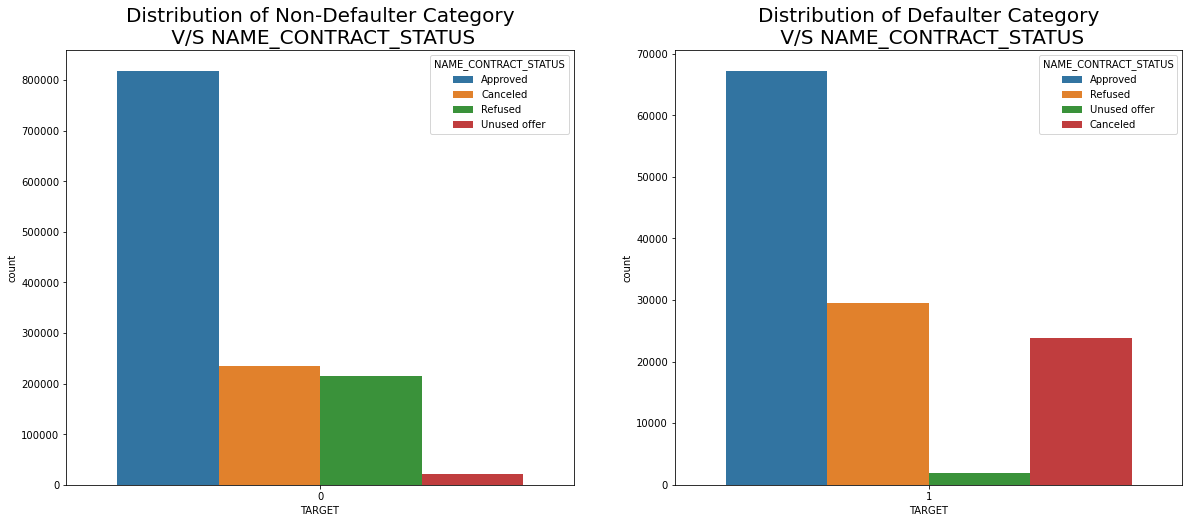

In [87]:
# Analysyis on NAME_CONTRACT_STATUS versus for non-defaulter and defaulter

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Distribution of Non-Defaulter Category\n'+' V/S '+'NAME_CONTRACT_STATUS',fontsize=20)
sns.countplot(x='TARGET',hue='NAME_CONTRACT_STATUS',data=merged_df0)
plt.subplot(1,2,2)
plt.title('Distribution of Defaulter Category\n'+' V/S '+'NAME_CONTRACT_STATUS',fontsize=20)
sns.countplot(x='TARGET',hue='NAME_CONTRACT_STATUS',data=merged_df1)
plt.show()

# Insights:

- we could see some good insights after combining both the dataframes that almost 65000(plot2) loans has been approved by the bank and which are falling under Default category, which is loss for the bank.
- Plot1 says about non-defaulter category where we could see the company has refused almost 200000 loans, but the customer is capable of repaying the loans,This should be avoided to inccur profits to the bank


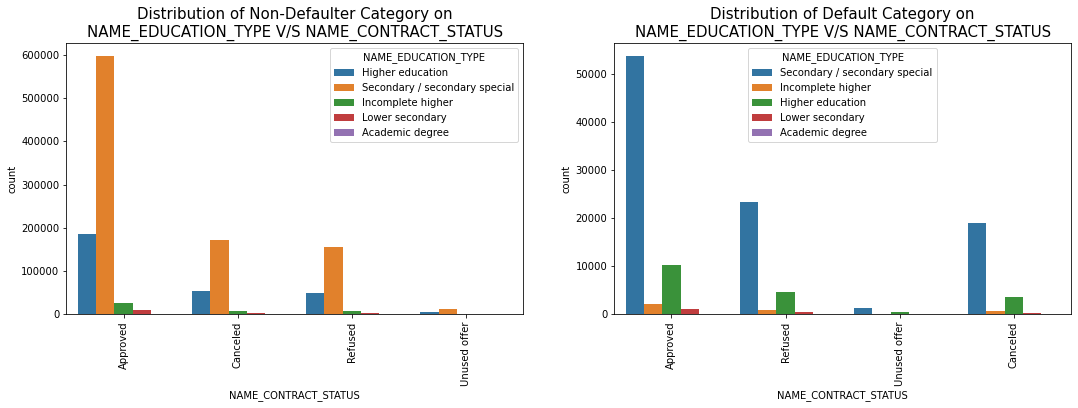

In [88]:
#Analysis on NAME_EDUCATION_TYPE V/S NAME_CONTRACT_STATUS for non-defaulter and defaulter

plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.title('Distribution of Non-Defaulter Category on\n'+'NAME_EDUCATION_TYPE V/S NAME_CONTRACT_STATUS',fontsize=15)
sns.countplot(x='NAME_CONTRACT_STATUS',hue='NAME_EDUCATION_TYPE',data=merged_df0)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title('Distribution of Default Category on\n'+'NAME_EDUCATION_TYPE V/S NAME_CONTRACT_STATUS',fontsize=15)
sns.countplot(x='NAME_CONTRACT_STATUS',hue='NAME_EDUCATION_TYPE',data=merged_df1)
plt.xticks(rotation=90)
plt.show()

# Insights:

- Bank should consider `Secondary/Secondary special` category since the customers are more from this category in both defaulter and non-default list.So other factors(varibales) should be considered before approving the loan


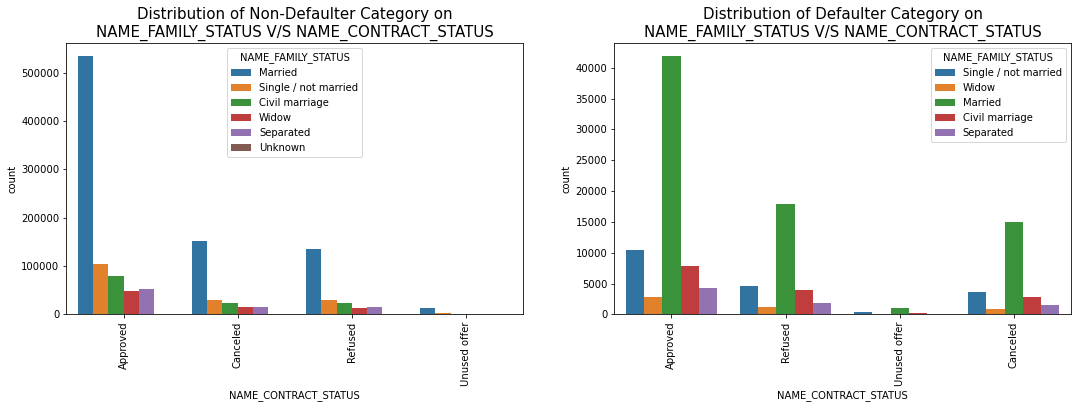

In [89]:
# Analysyis on NAME_FAMILY_STATUS V/S NAME_CONTRACT_STATUS for non-defaulter and defaulter

plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.title('Distribution of Non-Defaulter Category on\n'+'NAME_FAMILY_STATUS V/S NAME_CONTRACT_STATUS',fontsize=15)
sns.countplot(x='NAME_CONTRACT_STATUS',hue='NAME_FAMILY_STATUS',data=merged_df0)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title('Distribution of Defaulter Category on\n'+'NAME_FAMILY_STATUS V/S NAME_CONTRACT_STATUS',fontsize=15)
sns.countplot(x='NAME_CONTRACT_STATUS',hue='NAME_FAMILY_STATUS',data=merged_df1)
plt.xticks(rotation=90)
plt.show()

# Insights:

- From plot1 we can understand that some of the loans has been refused across different categories, But those category of people are capable of repaying the loan
- From plot2 we can say tht `Married` category has high count in refused and cancelled loans when compared with other categories

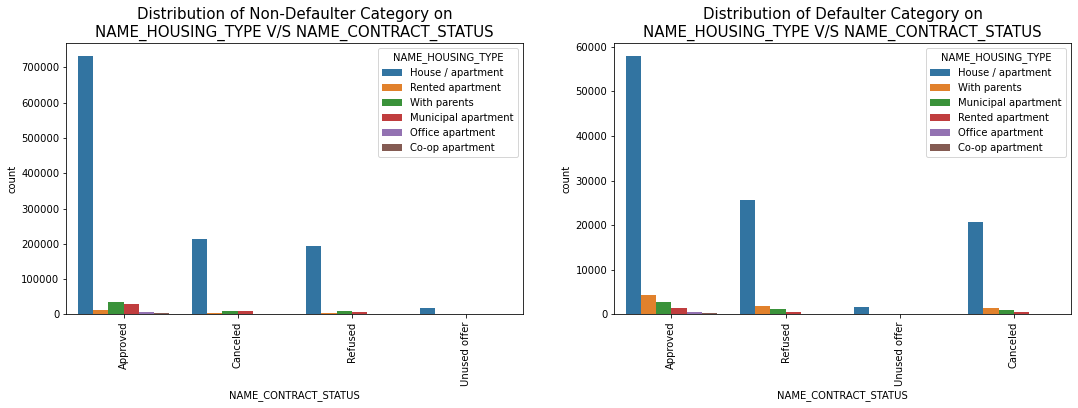

In [90]:
# Analysyis on NAME_HOUSING_TYPE V/S NAME_CONTRACT_STATUS for non-defaulter and defaulter

plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.title('Distribution of Non-Defaulter Category on\n'+'NAME_HOUSING_TYPE V/S NAME_CONTRACT_STATUS',fontsize=15)
sns.countplot(x='NAME_CONTRACT_STATUS',hue='NAME_HOUSING_TYPE',data=merged_df0)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title('Distribution of Defaulter Category on\n'+'NAME_HOUSING_TYPE V/S NAME_CONTRACT_STATUS',fontsize=15)
sns.countplot(x='NAME_CONTRACT_STATUS',hue='NAME_HOUSING_TYPE',data=merged_df1)
plt.xticks(rotation=90)
plt.show()

# Insights:

- The bank has refused some of the loans across different categories but actually they are capable of repaying. So bank may take another steps by reducing the loan amount and procing the loan to such customers to incur profits.
- Plot 2 shows high Loan approvals on `House/Apartment` category but the customers are falling under default category, Which results in loss for bank. So bank should consider that having`House/Apartments` doesn't really imply that the customer will be able to repay loan on time.

# Summary of Analysis:

## Bank should concentrate on following categories while providing loans:

- Banks can take risk in providing loans to >47 in generating profits. Since from our analysis we found that higher age group people are less in number under defaulters, When compared with other categories of age.
- Lesser the education of Client, High chances of falling in Defaulter's list. This can be considered to gain benefits.
- Employees staying in their current jobs for longer period of time, Chances of falling under defaulter is less, This should be considered while providing loan.
- By analysing the data we observed that clients belonging to Apartment/House are falling under defaulters which needs to be considered to incur profits.
- Bank should reduce their focus on ‘working’ category where we say huge percentage of people are falling under defaulters.
- Pensioner category are good for benefitting profits